<a href="https://colab.research.google.com/github/MinMint01/IntelUnnatiGrandChallenge_TeamClover/blob/main/Intel_Unnati_Grand_Challenge_Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS

>Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

>Loading the dataset

In [29]:
df=pd.read_csv('/content/unnati_phase1_data_revised.csv')

## Exploring the structure of the dataset



In [3]:
print(df.shape)

(21325, 7)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    21325 non-null  object 
 1   Date     21325 non-null  object 
 2   Time     21325 non-null  object 
 3   Lat      21325 non-null  float64
 4   Long     21325 non-null  float64
 5   Vehicle  21325 non-null  int64  
 6   Speed    21325 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58


In [6]:
df.describe()

,Lat,Long,Vehicle,Speed
count,21325.000000,21325.000000,21325.000000,21325.000000
mean,12.900458,80.118533,2910.684689,38.403845
std,0.147163,0.107352,1747.621338,16.847610
min,12.338685,79.774120,805.000000,0.000000
25%,12.850645,80.065984,805.000000,27.000000
50%,12.942436,80.129990,2846.000000,41.000000
75%,13.006814,80.205680,5339.000000,54.000000
max,13.182797,80.316079,5339.000000,65.000000


In [7]:
print("Number of Alert Types recorded:",len(df['Alert'].unique()))
print("Number of Unique Dates recorded:",len(df['Date'].unique()))
print("Number of Unique Time recorded:",len(df['Time'].unique()))
print("Number of Latitude Values recorded:",len(df['Lat'].unique()))
print("Number of Longitude Values recorded:",len(df['Long'].unique()))
print("Number of Vehicles recorded:",len(df['Vehicle'].unique()))
print("Number of Unique Speed Values recorded:",len(df['Speed'].unique()))

Number of Alert Types recorded: 4
Number of Unique Dates recorded: 51
Number of Unique Time recorded: 12334
Number of Latitude Values recorded: 17030
Number of Longitude Values recorded: 17031
Number of Vehicles recorded: 5
Number of Unique Speed Values recorded: 66


## Data Cleaning

>Checking for NaN values

In [8]:
df.isna().sum()

Alert      0
Date       0
Time       0
Lat        0
Long       0
Vehicle    0
Speed      0
dtype: int64

**Here, we can see that there are no missing values.**

>Checking for duplicate rows

In [9]:
df.duplicated().sum()

389

In [10]:
df.groupby(df.columns.tolist(), as_index=False).size()

,Alert,Date,Time,Lat,Long,Vehicle,Speed,size
0,cas_fcw,2022-06-01,06:26:32,12.724588,79.982251,805,33,1
1,cas_fcw,2022-06-01,06:34:09,13.061608,80.254414,2846,26,1
2,cas_fcw,2022-06-01,06:34:11,13.061608,80.254414,2846,26,1
3,cas_fcw,2022-06-01,06:41:35,12.630791,79.931575,805,58,1
4,cas_fcw,2022-06-01,17:01:28,12.747127,79.995694,805,58,1
...,...,...,...,...,...,...,...,...
20931,cas_pcw,2022-08-31,18:06:32,13.063161,80.274090,5339,0,1
20932,cas_pcw,2022-08-31,18:11:10,13.068362,80.269104,5339,17,1
20933,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30,1
20934,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34,1


**We can see some of the rows are still duplicated. We are going to remove them.**

In [33]:
df = df.drop_duplicates(ignore_index=True)
df

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58
...,...,...,...,...,...,...,...
20931,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30
20932,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34
20933,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24
20934,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23


**Checking again for any more duplicates:**

In [34]:
df.duplicated().sum()

0

>Checking for date format throughout

In [17]:
is_correct_format = pd.to_datetime(df['Date'], format='%Y/%m/%d', errors='coerce').notna().all()
print(is_correct_format)

True


In [19]:
is_correct_format = pd.to_datetime(df['Date'], format='%Y/%m/%d', errors='coerce').notna().all()
print(is_correct_format)

True


>Checking for time format throughout

In [20]:
expected_time_format = '%H:%M:%S'
is_correct_time_format = pd.to_datetime(df['Time'], format=expected_time_format, errors='coerce').notna().all()
print(is_correct_time_format)

True


>Converting to appropriate datatypes

In [21]:
def correct_datatypes(df):
    df_copy = df.copy()
    df_copy['Alert'] = df_copy['Alert'].astype(str)
    df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%Y/%m/%d')
    df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.time
    df_copy['Lat'] = df_copy['Lat'].astype(float)
    df_copy['Long'] = df_copy['Long'].astype(float)
    df_copy['Vehicle'] = df_copy['Vehicle'].astype(int)
    df_copy['Speed'] = df_copy['Speed'].astype(int)
    return df_copy

In [22]:
df = correct_datatypes(df)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20936 entries, 0 to 20935
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Alert    20936 non-null  object        
 1   Date     20936 non-null  datetime64[ns]
 2   Time     20936 non-null  object        
 3   Lat      20936 non-null  float64       
 4   Long     20936 non-null  float64       
 5   Vehicle  20936 non-null  int64         
 6   Speed    20936 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.1+ MB


>Exporting modified dataset

In [35]:
df.to_csv('new_dataset.csv', index=False)

## Loading the cleaned dataset

In [36]:
df=pd.read_csv('/content/new_dataset.csv')

In [37]:
df = correct_datatypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20936 entries, 0 to 20935
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Alert    20936 non-null  object        
 1   Date     20936 non-null  datetime64[ns]
 2   Time     20936 non-null  object        
 3   Lat      20936 non-null  float64       
 4   Long     20936 non-null  float64       
 5   Vehicle  20936 non-null  int64         
 6   Speed    20936 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.1+ MB


## Data visualization

>Frequency Bar Charts

>>Alert

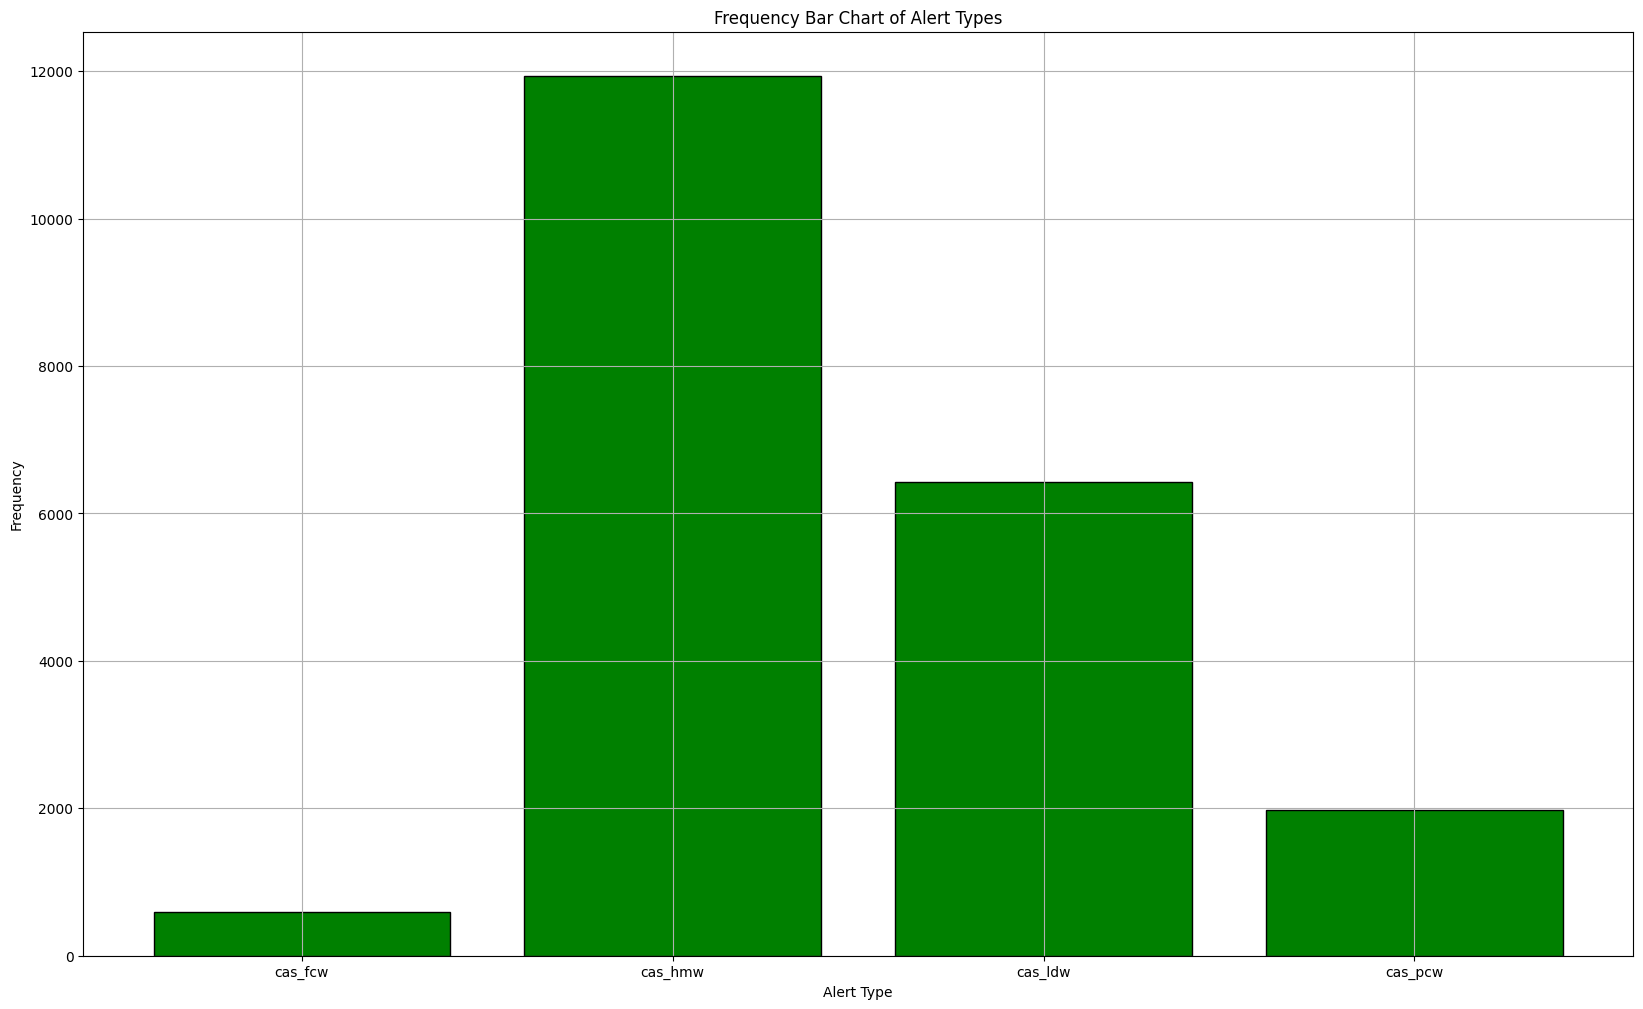

In [38]:
alert_counts = df['Alert'].value_counts().sort_index()

plt.figure(figsize=(20, 12))
plt.bar(alert_counts.index, alert_counts.values, color='green', edgecolor='black')
plt.xlabel('Alert Type')
plt.ylabel('Frequency')
plt.title('Frequency Bar Chart of Alert Types')
plt.xticks(df['Alert'].unique())
plt.grid(True)
plt.show()

**The 'cas_hmw' alert occurs the most throughout the dataset while 'cas_fcw' occurs the least.**

>>Date

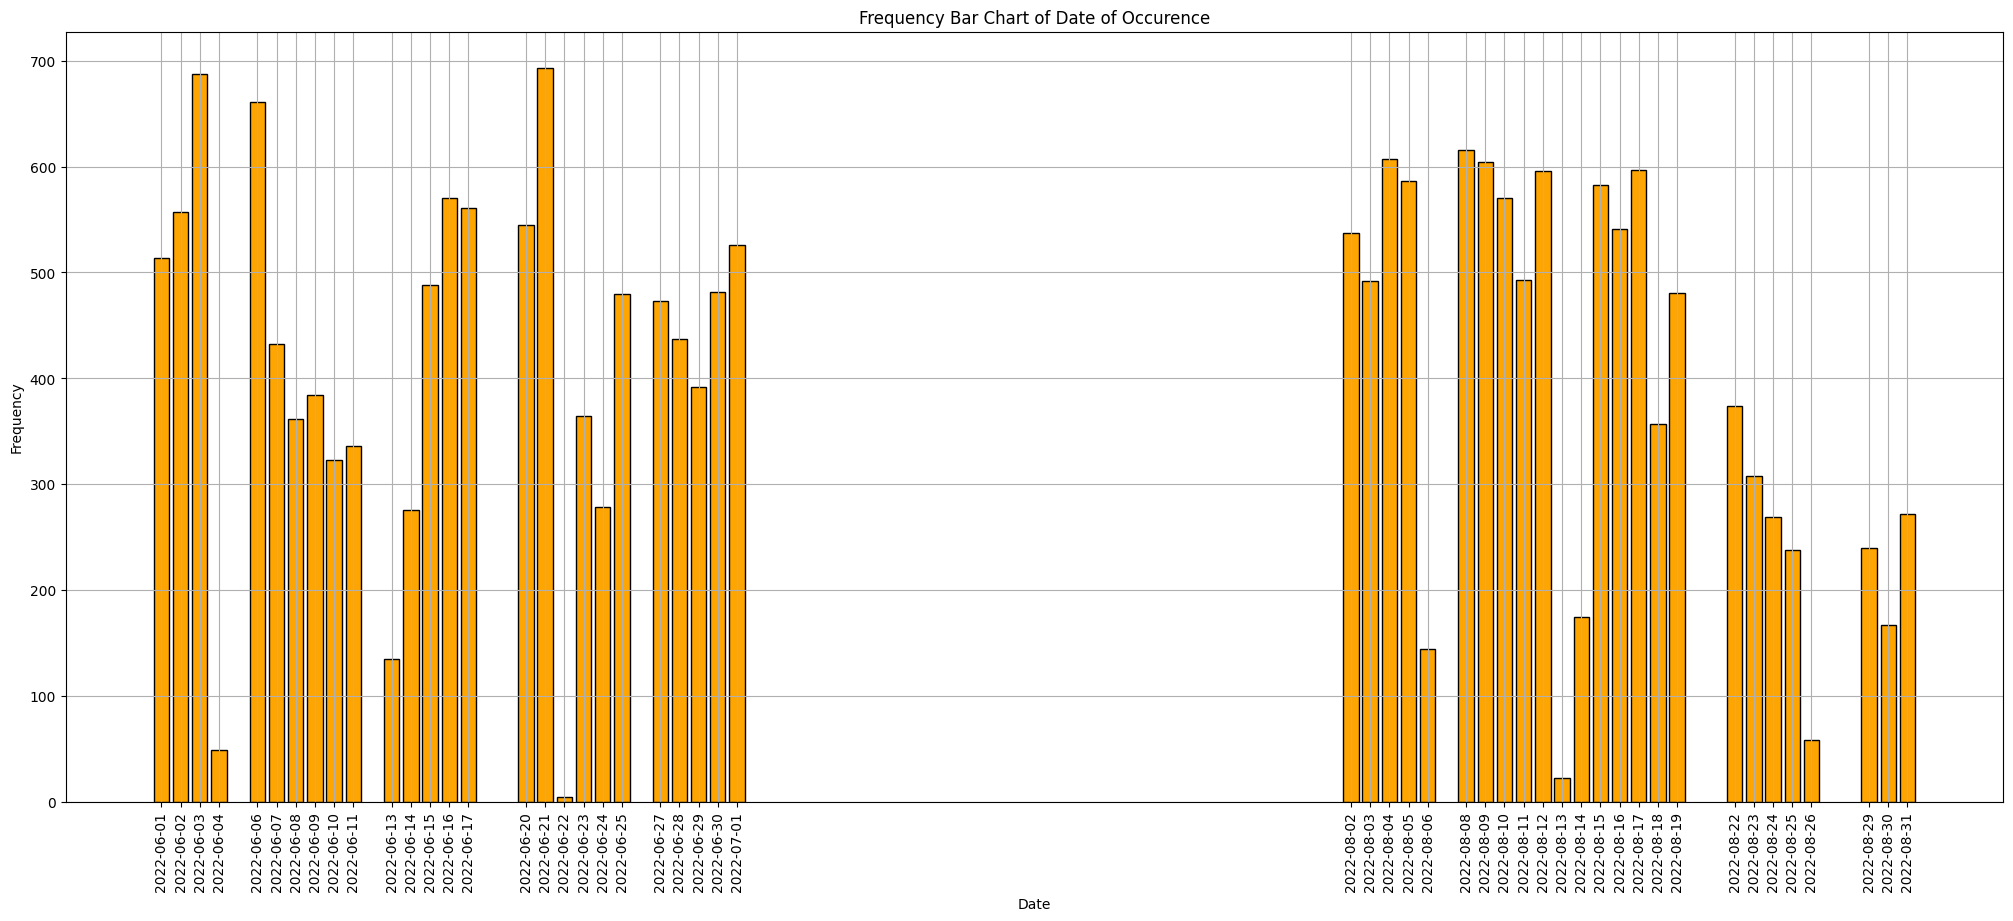

In [39]:
date_counts = df['Date'].value_counts().sort_index()

plt.figure(figsize=(25, 10))
plt.bar(date_counts.index, date_counts.values, color='orange', edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Frequency Bar Chart of Date of Occurence')
plt.xticks(df['Date'].unique(),rotation=90)
plt.grid(True)
plt.show()

**'21-06-2022' is the date on which most amount of alerts have been recorded.**

>>Time

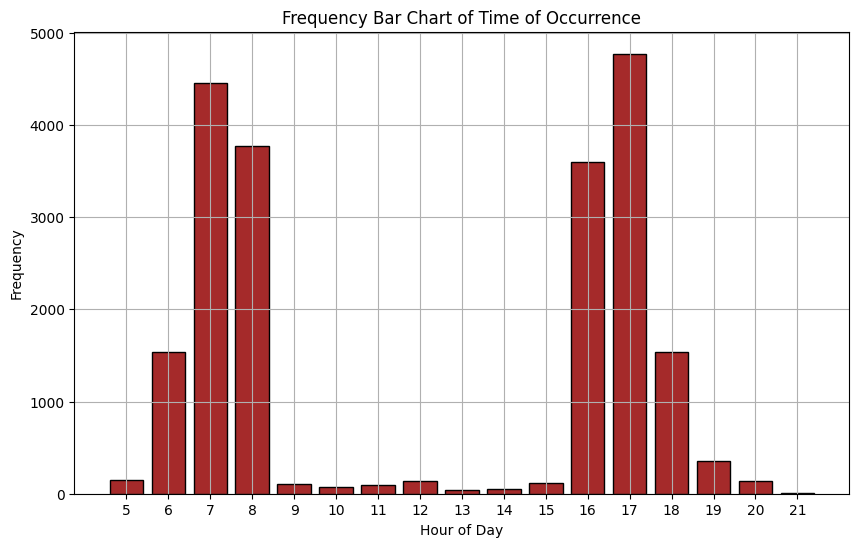

In [40]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='brown', edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Frequency Bar Chart of Time of Occurrence')
plt.xticks(hourly_counts.index)
plt.grid(True)
plt.show()

**The frequency bar chart of time of occurrence shows that the most alerts occurred between 7 and 8 AM, followed by 4 and 5 PM. There are fewer alerts in the noon and evening, and the fewest alerts occur overnight**

>>Vehicle

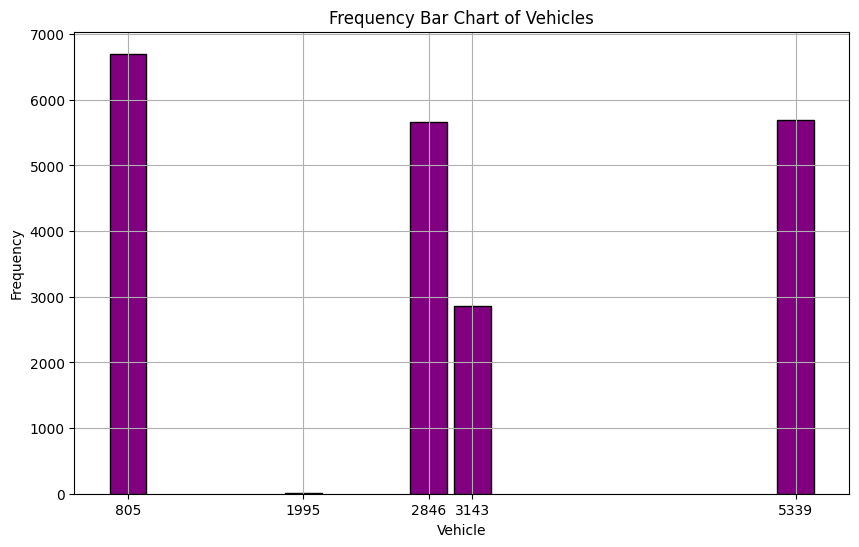

In [41]:
vehicle_counts = df['Vehicle'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(vehicle_counts.index, vehicle_counts.values, color='purple', edgecolor='black', width=250)
plt.xlabel('Vehicle')
plt.ylabel('Frequency')
plt.title('Frequency Bar Chart of Vehicles')
plt.xticks(df['Vehicle'].unique())
plt.grid(True)
plt.show()

**Vehicle '805' data is recorded most throughout the dataset while '1995' is the lowest**

>>Speed



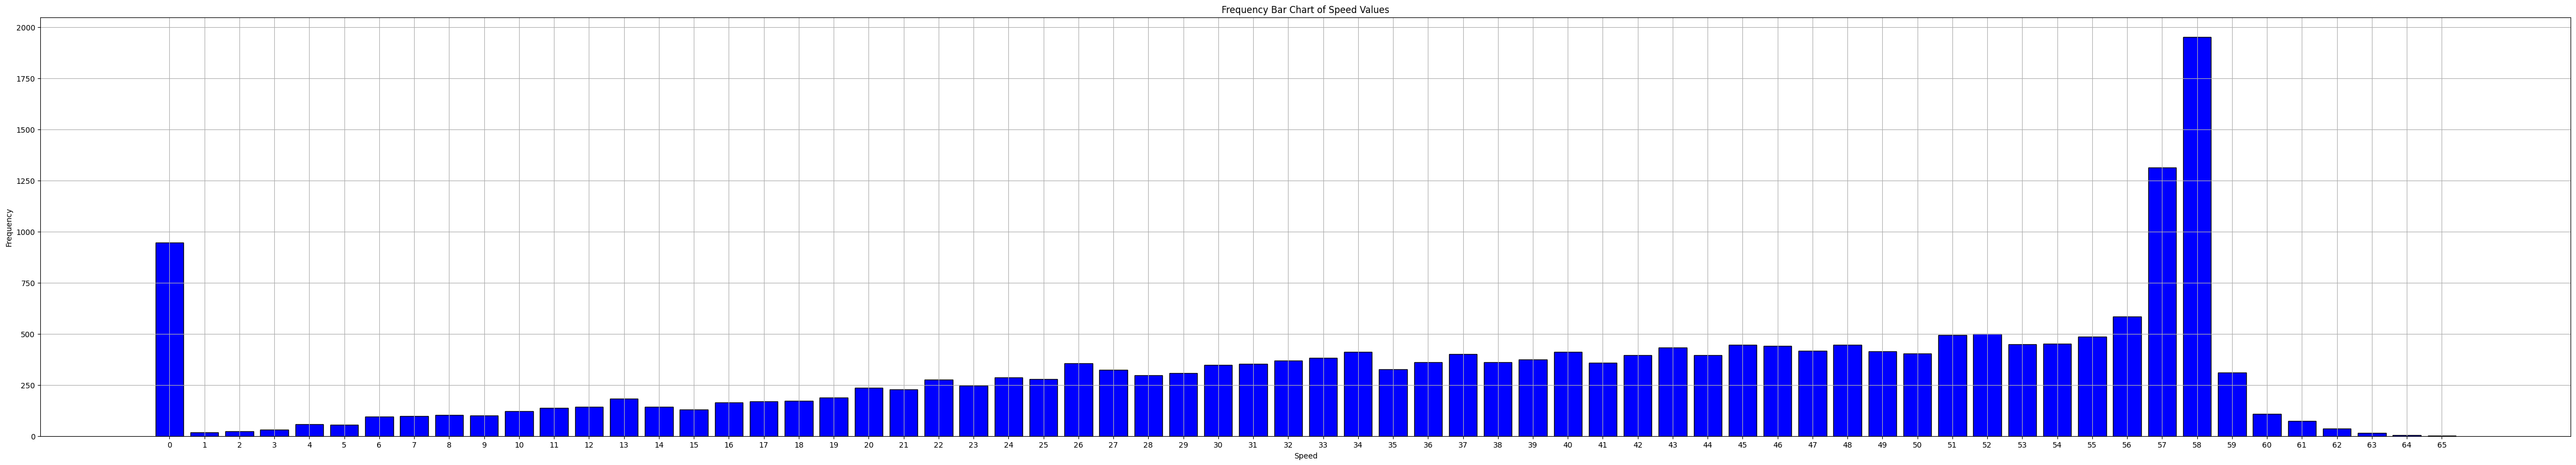

In [42]:
speed_counts = df['Speed'].value_counts().sort_index()

plt.figure(figsize=(60, 10))
plt.bar(speed_counts.index, speed_counts.values, color='blue', edgecolor='black')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Frequency Bar Chart of Speed Values')
plt.xticks(df['Speed'].unique())
plt.grid(True)
plt.show()

**Here, we can see that the speed '58' occurs the most throughout the dataset.**

> Charts with Alert Type on X-axis

>>Vehicle counts for different alerts

<Figure size 1000x600 with 0 Axes>

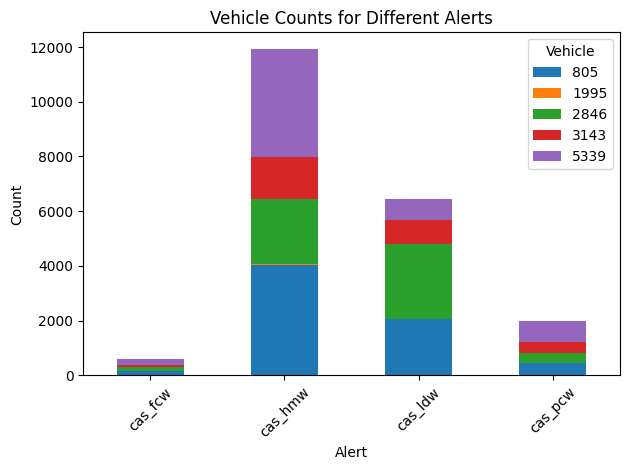

In [43]:
alert_vehicle_counts = df.groupby(['Alert', 'Vehicle']).size().reset_index(name='Count')

pivot_table = alert_vehicle_counts.pivot_table(index='Alert', columns='Vehicle', values='Count', fill_value=0)

plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Alert')
plt.ylabel('Count')
plt.title('Vehicle Counts for Different Alerts')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Here we can see that the Headway Monitoring and Warning (HMW) alert is involved in the most number of incidents, with the vehicle type 805 being dominant. On the other hand, there is a very low occurrence of vehicles of type 3143 and 1995.**

Average Speed encountered in each alert

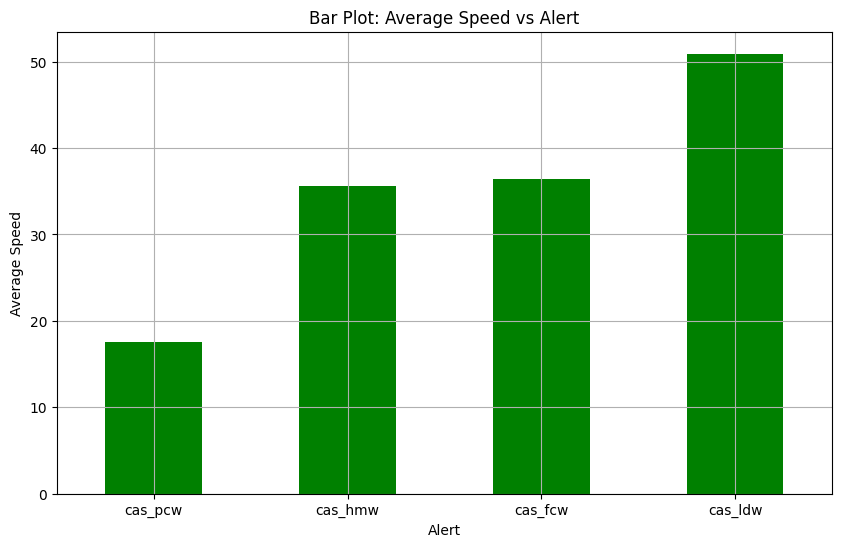

In [44]:
average_speed_per_alert = df.groupby('Alert')['Speed'].mean()

plt.figure(figsize=(10, 6))
average_speed_per_alert.sort_values().plot(kind='bar', color='green')
plt.xlabel('Alert')
plt.ylabel('Average Speed')
plt.title('Bar Plot: Average Speed vs Alert')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Average speed for ldw: 50
Average speed for fcw: 35
Average speed for hmw: 35
Average speed for pcw: 17**


> Charts with Date and Time on X-axis (Time Series)

>>Number of Alerts Over Time

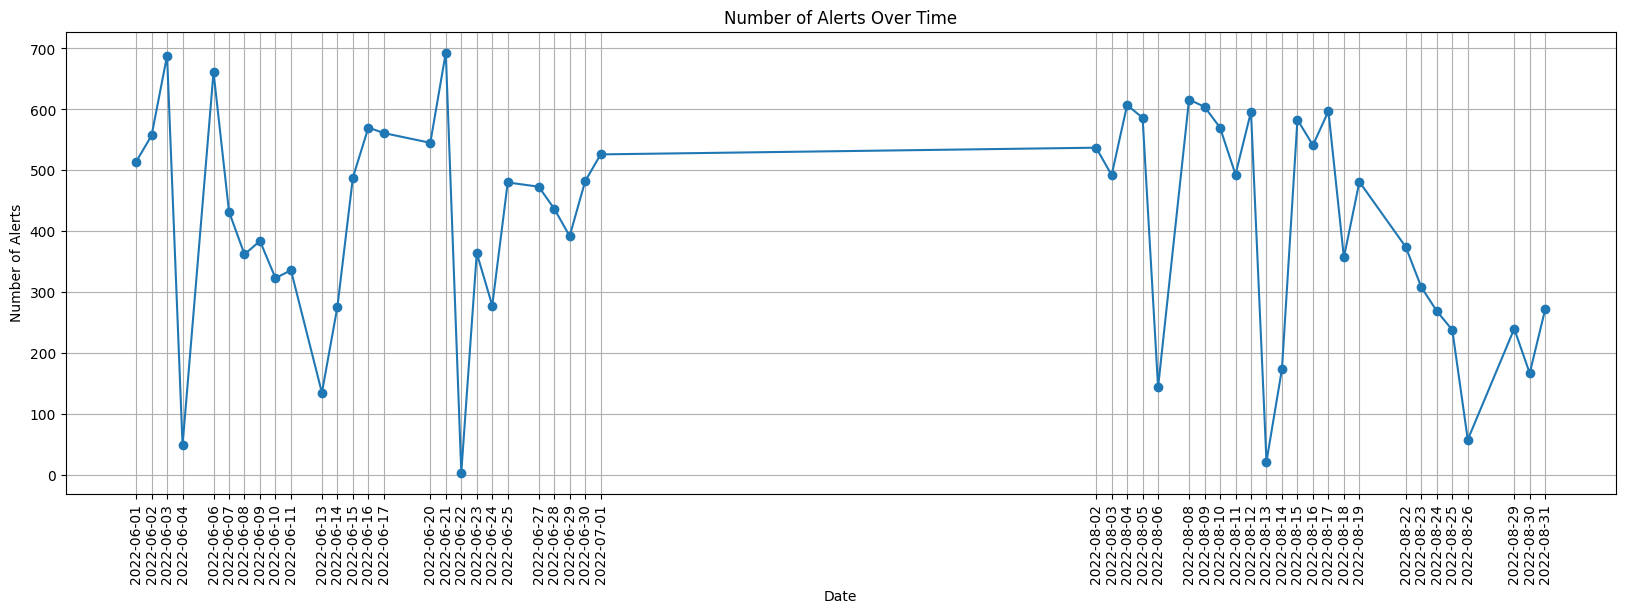

In [46]:
alerts_over_time = df.groupby('Date')['Alert'].count()

plt.figure(figsize=(20, 6))
plt.plot(alerts_over_time.index, alerts_over_time.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Alerts')
plt.title('Number of Alerts Over Time')
plt.xticks(df['Date'].unique(),rotation=90)
plt.grid(True)
plt.show()

>>Average Speed Over Time

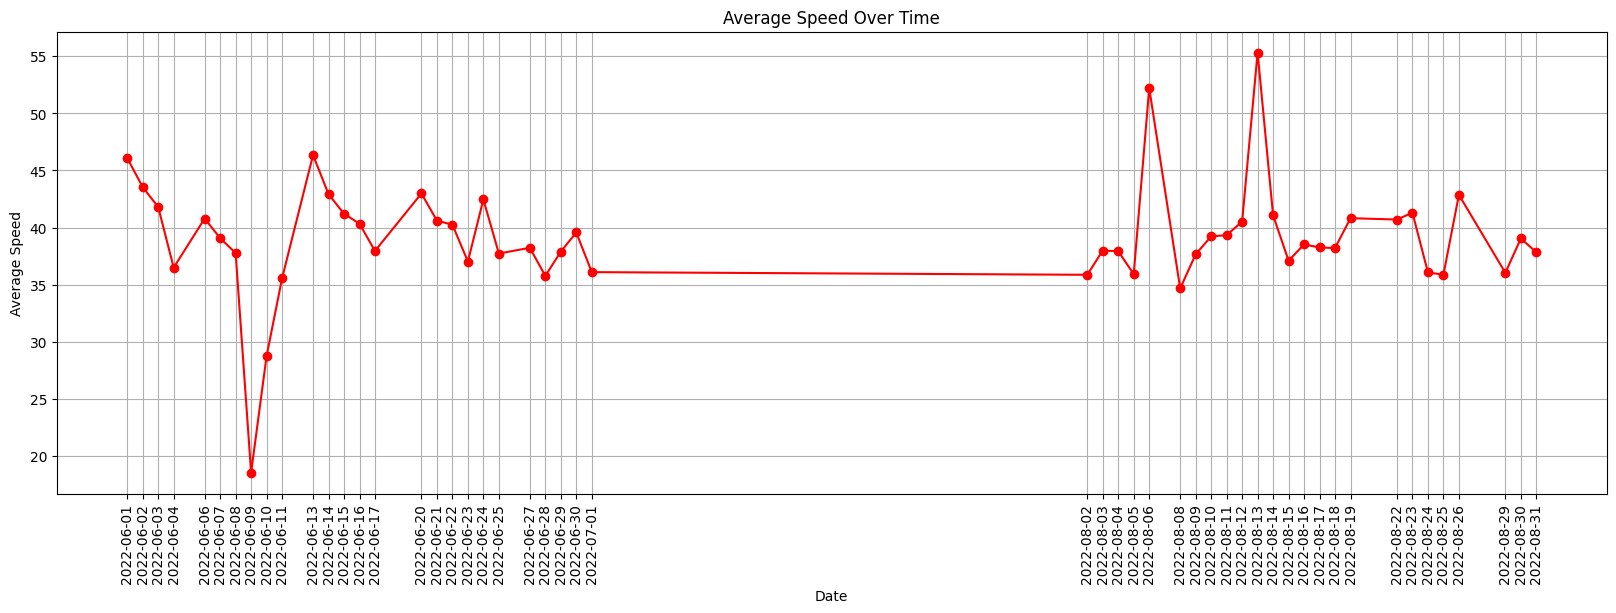

In [48]:
average_speed_over_time = df.groupby('Date')['Speed'].mean()

plt.figure(figsize=(20, 6))
plt.plot(average_speed_over_time.index, average_speed_over_time.values, marker='o', color='red')
plt.xlabel('Date')
plt.ylabel('Average Speed')
plt.title('Average Speed Over Time')
plt.xticks(df['Date'].unique(),rotation=90)
plt.grid(True)
plt.show()

>>Number of each Alert Type Over Time

<Figure size 10000x5000 with 0 Axes>

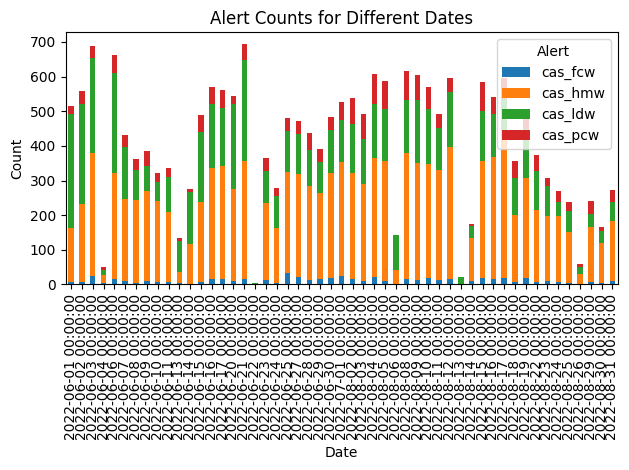

In [52]:
alert_on_date_counts = df.groupby(['Alert', 'Date']).size().reset_index(name='Count')

pivot_table = alert_on_date_counts.pivot_table(index='Date', columns='Alert', values='Count', fill_value=0)

plt.figure(figsize=(100, 50))
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Alert Counts for Different Dates')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

>>Vehicle Involvement During Different Hours of the Day

<Figure size 1200x600 with 0 Axes>

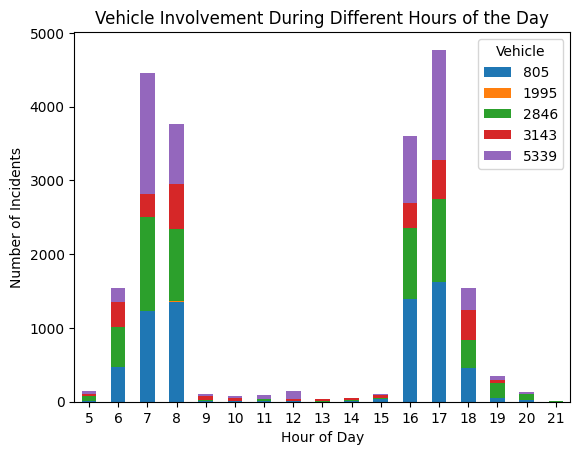

In [54]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()

vehicle_hour_count = df.groupby(['Hour', 'Vehicle'])['Alert'].count().unstack()

plt.figure(figsize=(12, 6))
vehicle_hour_count.plot(kind='bar', stacked=True)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.title('Vehicle Involvement During Different Hours of the Day')
plt.legend(title='Vehicle')
plt.xticks(rotation=0)
plt.show()

> Charts with Vehicles on X-axis

Average speed for each vehicle

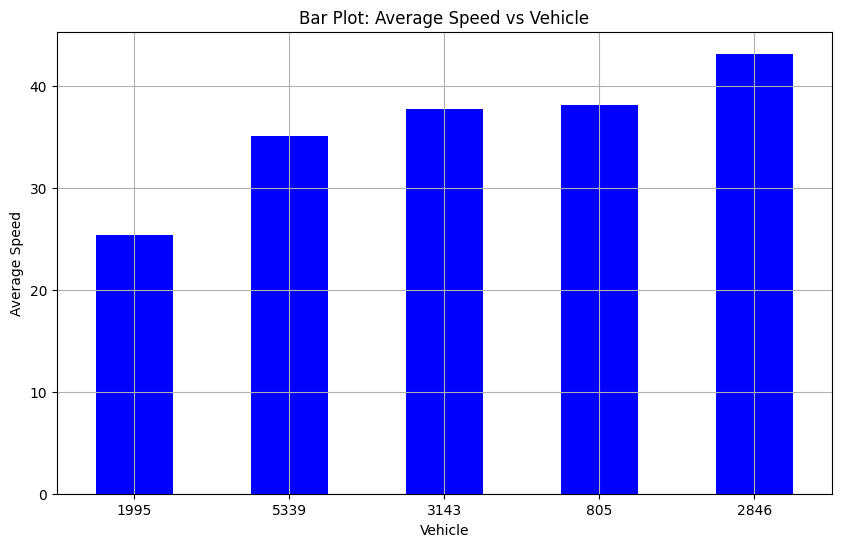

In [55]:
average_speed_per_vehicle = df.groupby('Vehicle')['Speed'].mean()

plt.figure(figsize=(10, 6))
average_speed_per_vehicle.sort_values().plot(kind='bar', color='blue')
plt.xlabel('Vehicle')
plt.ylabel('Average Speed')
plt.title('Bar Plot: Average Speed vs Vehicle')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

>Geospatial Distribution

>>Alerts' Geospatial Distribution (Latitude vs. Longitude)

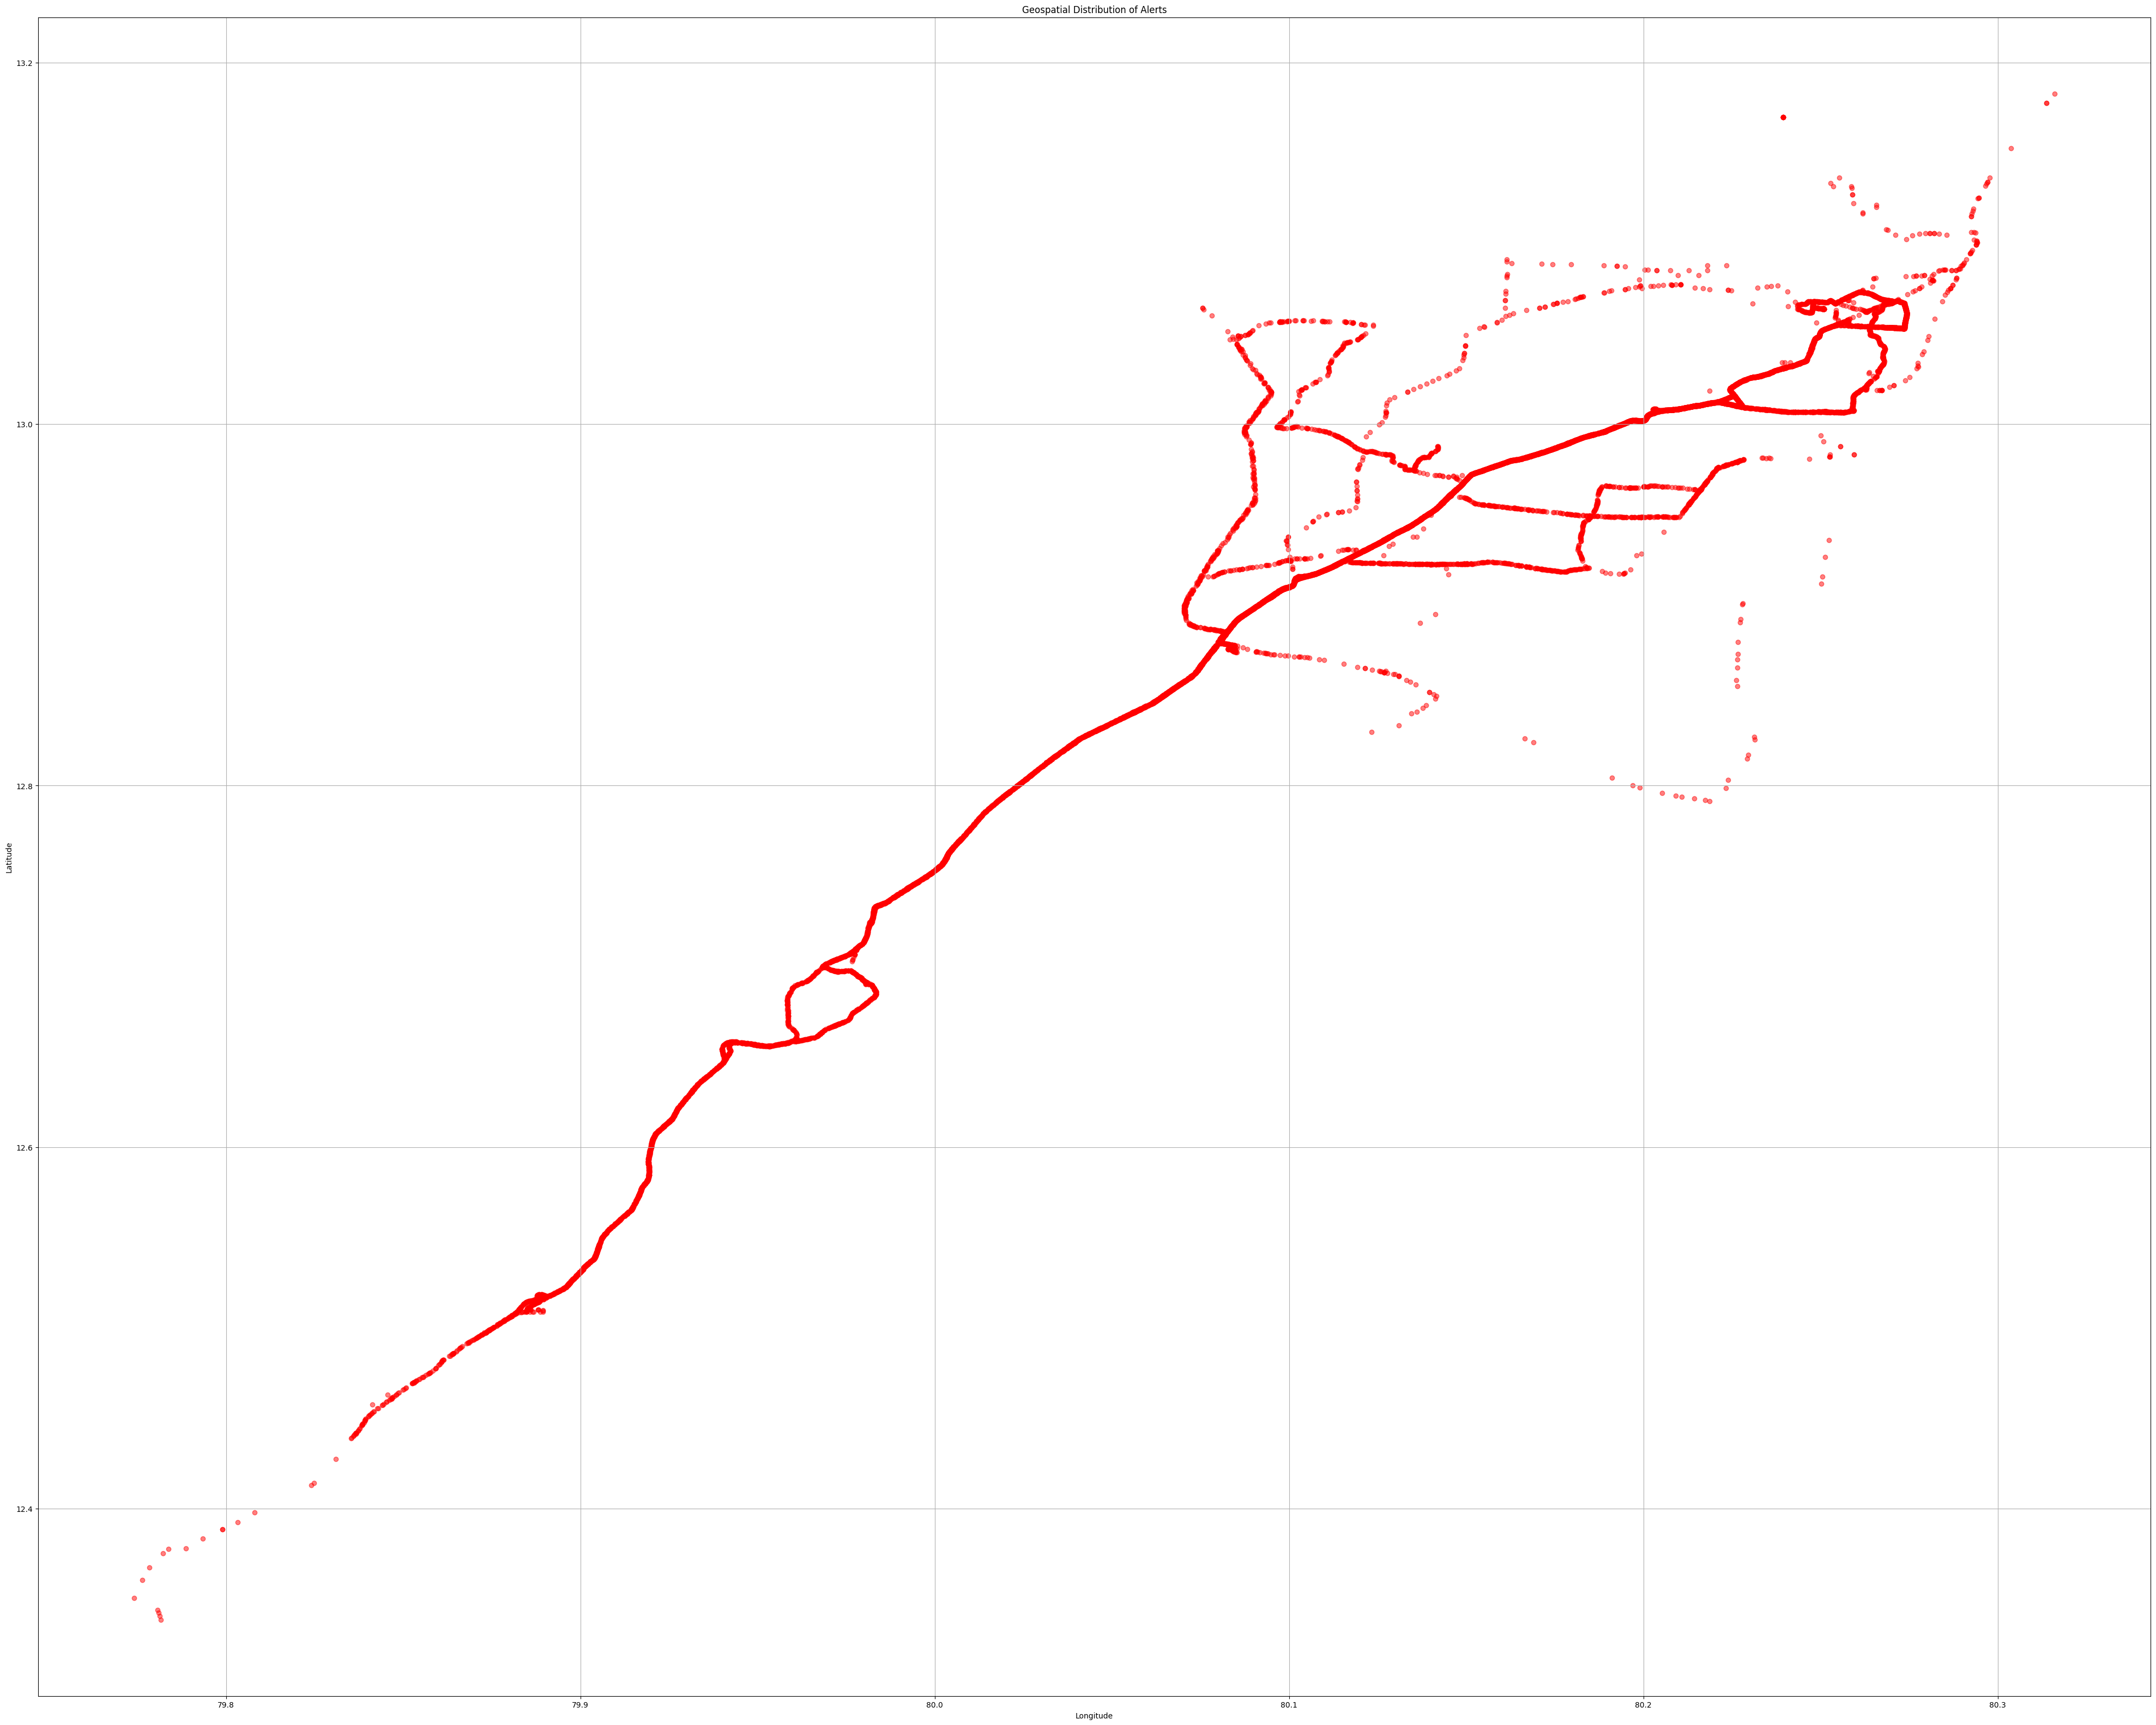

In [56]:
plt.figure(figsize=(50, 40))
plt.scatter(df['Long'], df['Lat'], c='red', marker='o', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Alerts')
plt.grid(True)
plt.show()

>>Alert Types' Geospatial Distribution (Latitude vs. Longitude)

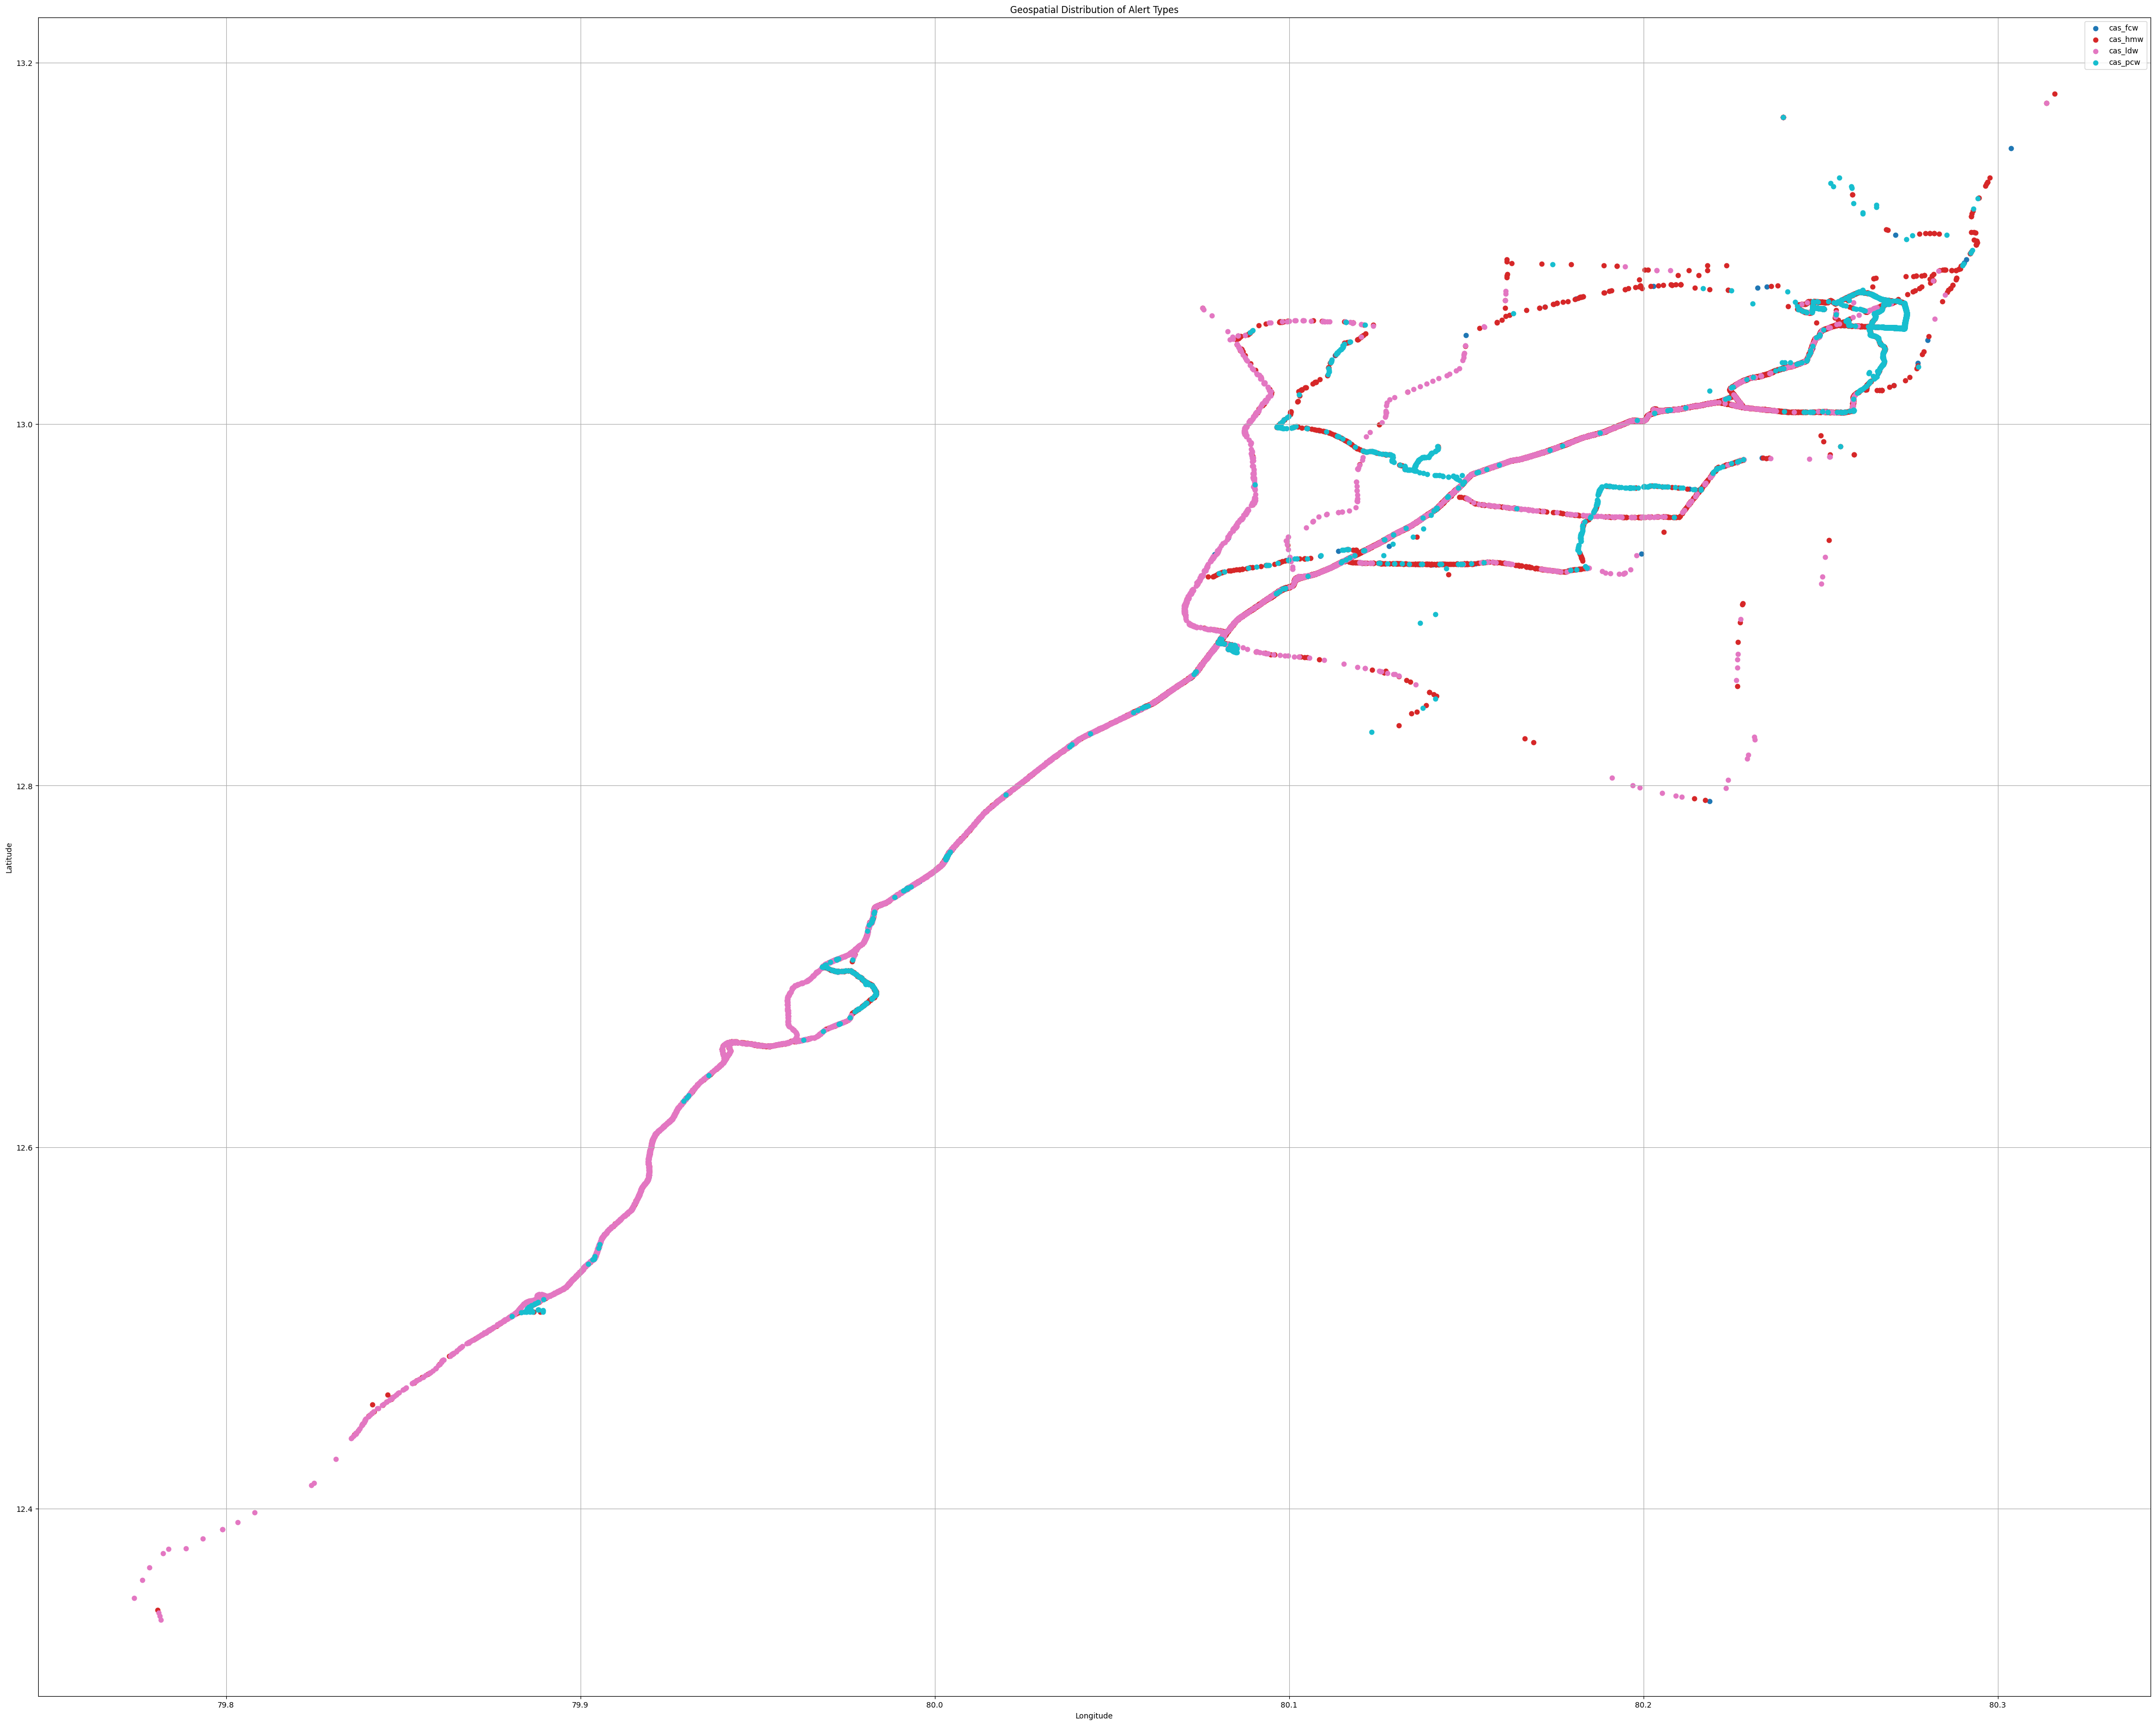

In [57]:
df['Alert'] = df['Alert'].astype('category')

color_map = plt.get_cmap('tab10', lut=len(df['Alert'].cat.categories))

plt.figure(figsize=(50, 40))
for i, alert_type in enumerate(df['Alert'].cat.categories):
    alert_type_df = df[df['Alert'] == alert_type]
    plt.scatter(alert_type_df['Long'], alert_type_df['Lat'], label=alert_type, color=color_map(i))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Alert Types')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-58-818fe273c3a2>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', 100)


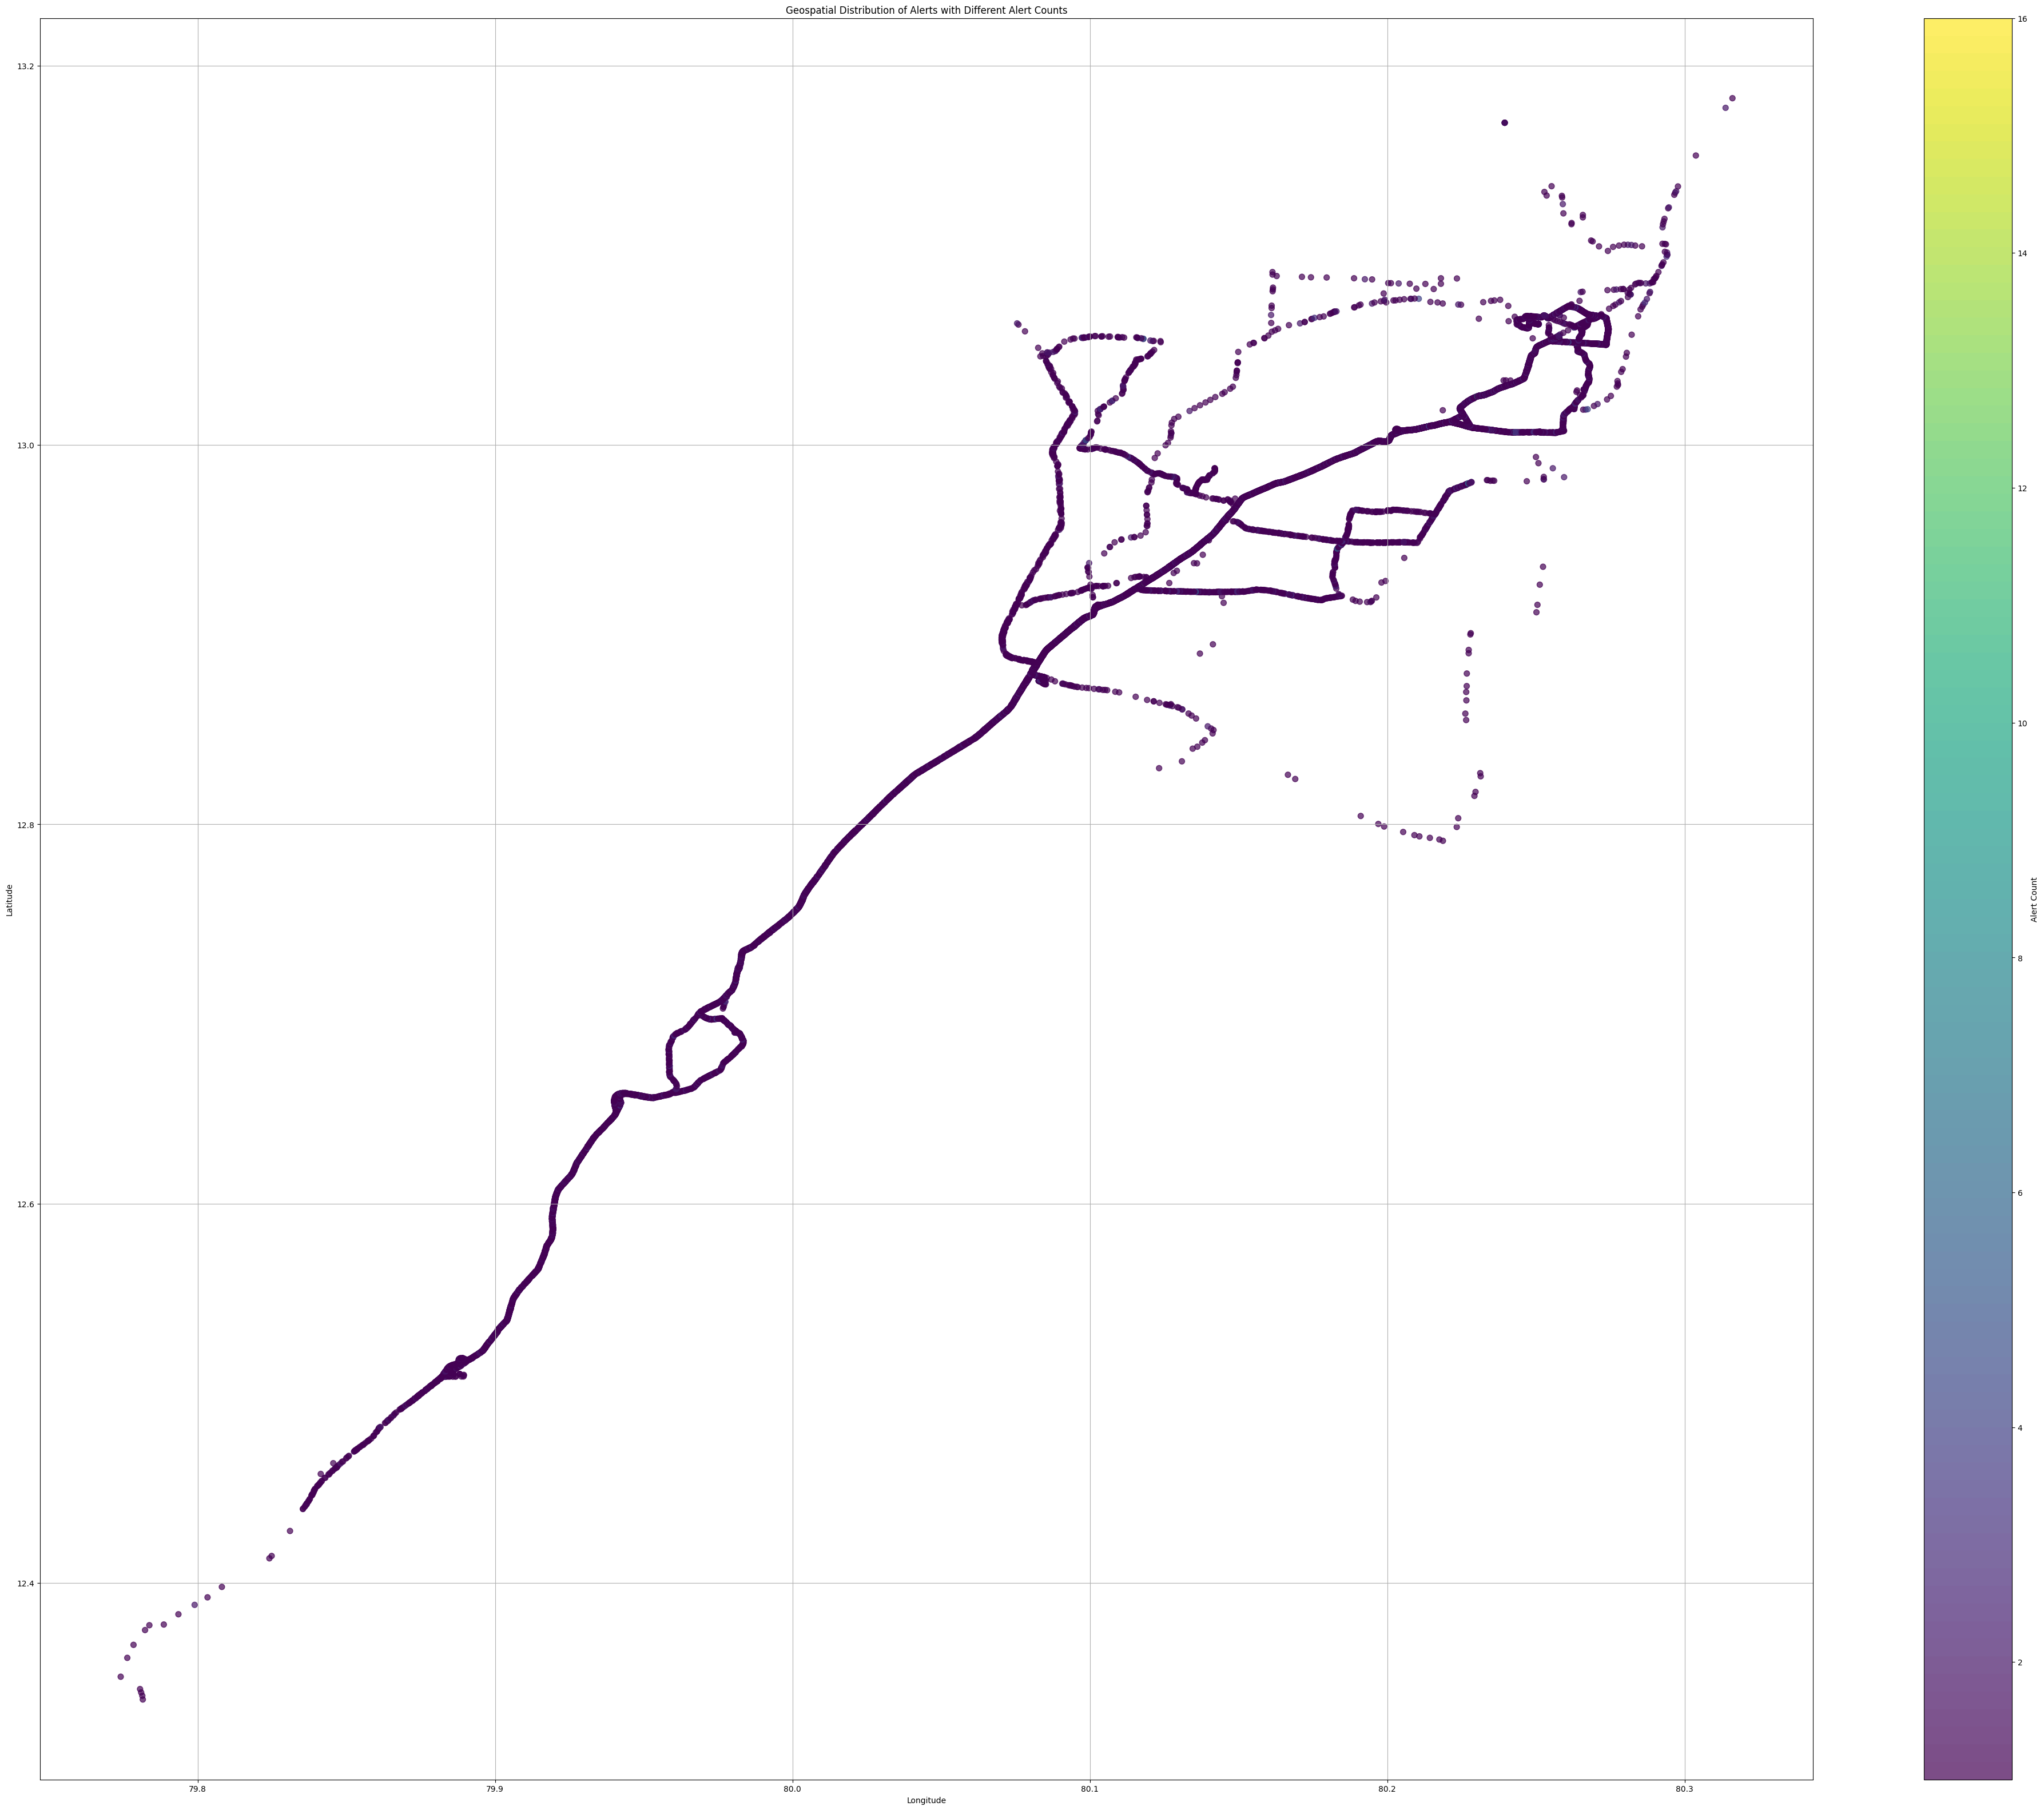

In [58]:
alert_counts = df.groupby(['Lat', 'Long']).size().reset_index(name='AlertCount')

color_map = plt.cm.get_cmap('viridis', 100)
vmin = alert_counts['AlertCount'].min()
vmax = alert_counts['AlertCount'].max()

plt.figure(figsize=(50, 40))
sc = plt.scatter(alert_counts['Long'], alert_counts['Lat'], c=alert_counts['AlertCount'], cmap=color_map, s=50, alpha=0.7, vmin=vmin, vmax=vmax)

cbar = plt.colorbar(sc)
cbar.set_label('Alert Count')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Alerts with Different Alert Counts')
plt.grid(True)
plt.show()
